In [1]:
import cv2 as cv

from matplotlib import pyplot as plt

import scipy as sp
import numpy as np

In [2]:
nonoise_vid = cv.VideoCapture('./1tagvideo.mp4')
if (nonoise_vid.isOpened() == False):
	print("Error opening the video file")
else:
  # Get frame rate information

  fps = int(nonoise_vid.get(5))
  print("Frame Rate : ",fps,"frames per second")	

  # Get frame count
  frame_count = nonoise_vid.get(7)
  print("Frame count : ", frame_count)


Frame Rate :  26 frames per second
Frame count :  787.0


In [3]:
frames = []
while(nonoise_vid.isOpened()):
	# nonoise_vid.read() methods returns a tuple, first element is a bool 
	# and the second is frame
  ret, frame = nonoise_vid.read()
  if ret == True:
    #Split the channels and invert color of the frame as we are only interested in the red channel
    frames.append(frame)
  else:
    break

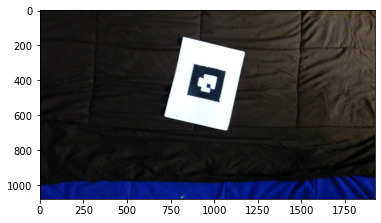

In [4]:
img = frames[0]
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
img[dst>0.01*dst.max()] = [0,0,255]
plt.imshow(img,"gray")

### Converting image into frequency domain

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x26eb66d9dc8>)

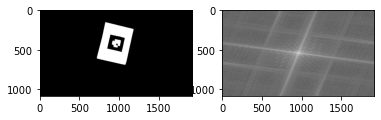

In [5]:
img1 = frames[0]
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray1 = cv.GaussianBlur(gray1,(5,5),0.9)
gray1 = np.float32(gray1>150)

f= np.fft.fft2(gray1)
f = np.fft.fftshift(f)
magnitude = 20*np.log(np.abs(f))

plt.subplot(2,2,1),plt.imshow(gray1,"gray")
plt.subplot(2,2,2),plt.imshow(magnitude,"gray")

### Making a bandpass filter

In [40]:
rows, cols = gray1.shape
crow, ccol = int(rows/2), int(cols/2)
mask = np.zeros((rows, cols), np.uint8)
size1 = 200
size2 = 500
x, y = np.ogrid[:rows, :cols]
bandpass_filter = np.logical_and(((x - crow) ** 2 + (y - ccol) ** 2 >= size1 ** 2),
                           ((x - crow) ** 2 + (y - ccol) ** 2 <= size2 ** 2))
mask[bandpass_filter] = 1

### Inverse FFT

In [60]:
iff_img = f*mask
ifft_mag = 2000*np.log(np.abs(iff_img))
iff_img = np.fft.ifftshift(iff_img)
sp.fft.ifftn(iff_img)
iff_img = np.fft.ifft2(iff_img)


magnitude = 20*np.log(np.abs(iff_img))
plt.subplot(2,2,1),plt.imshow(ifft_mag,"gray")
plt.subplot(2,2,2),plt.imshow(magnitude,"gray")
plt.subplot(2,2,3),plt.imshow(np.float32(magnitude>0),"gray")

C:\Users\X1\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


AttributeError: 'function' object has no attribute 'ifftn'

In [57]:
magnitude.min()

-460.55152632755573